In [1]:
import scanpy as sc

import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']

In [2]:
adata=sc.read("adata_cc.h5ad")

In [3]:
sc.tl.rank_genes_groups(adata,groupby="annot",method="wilcoxon")

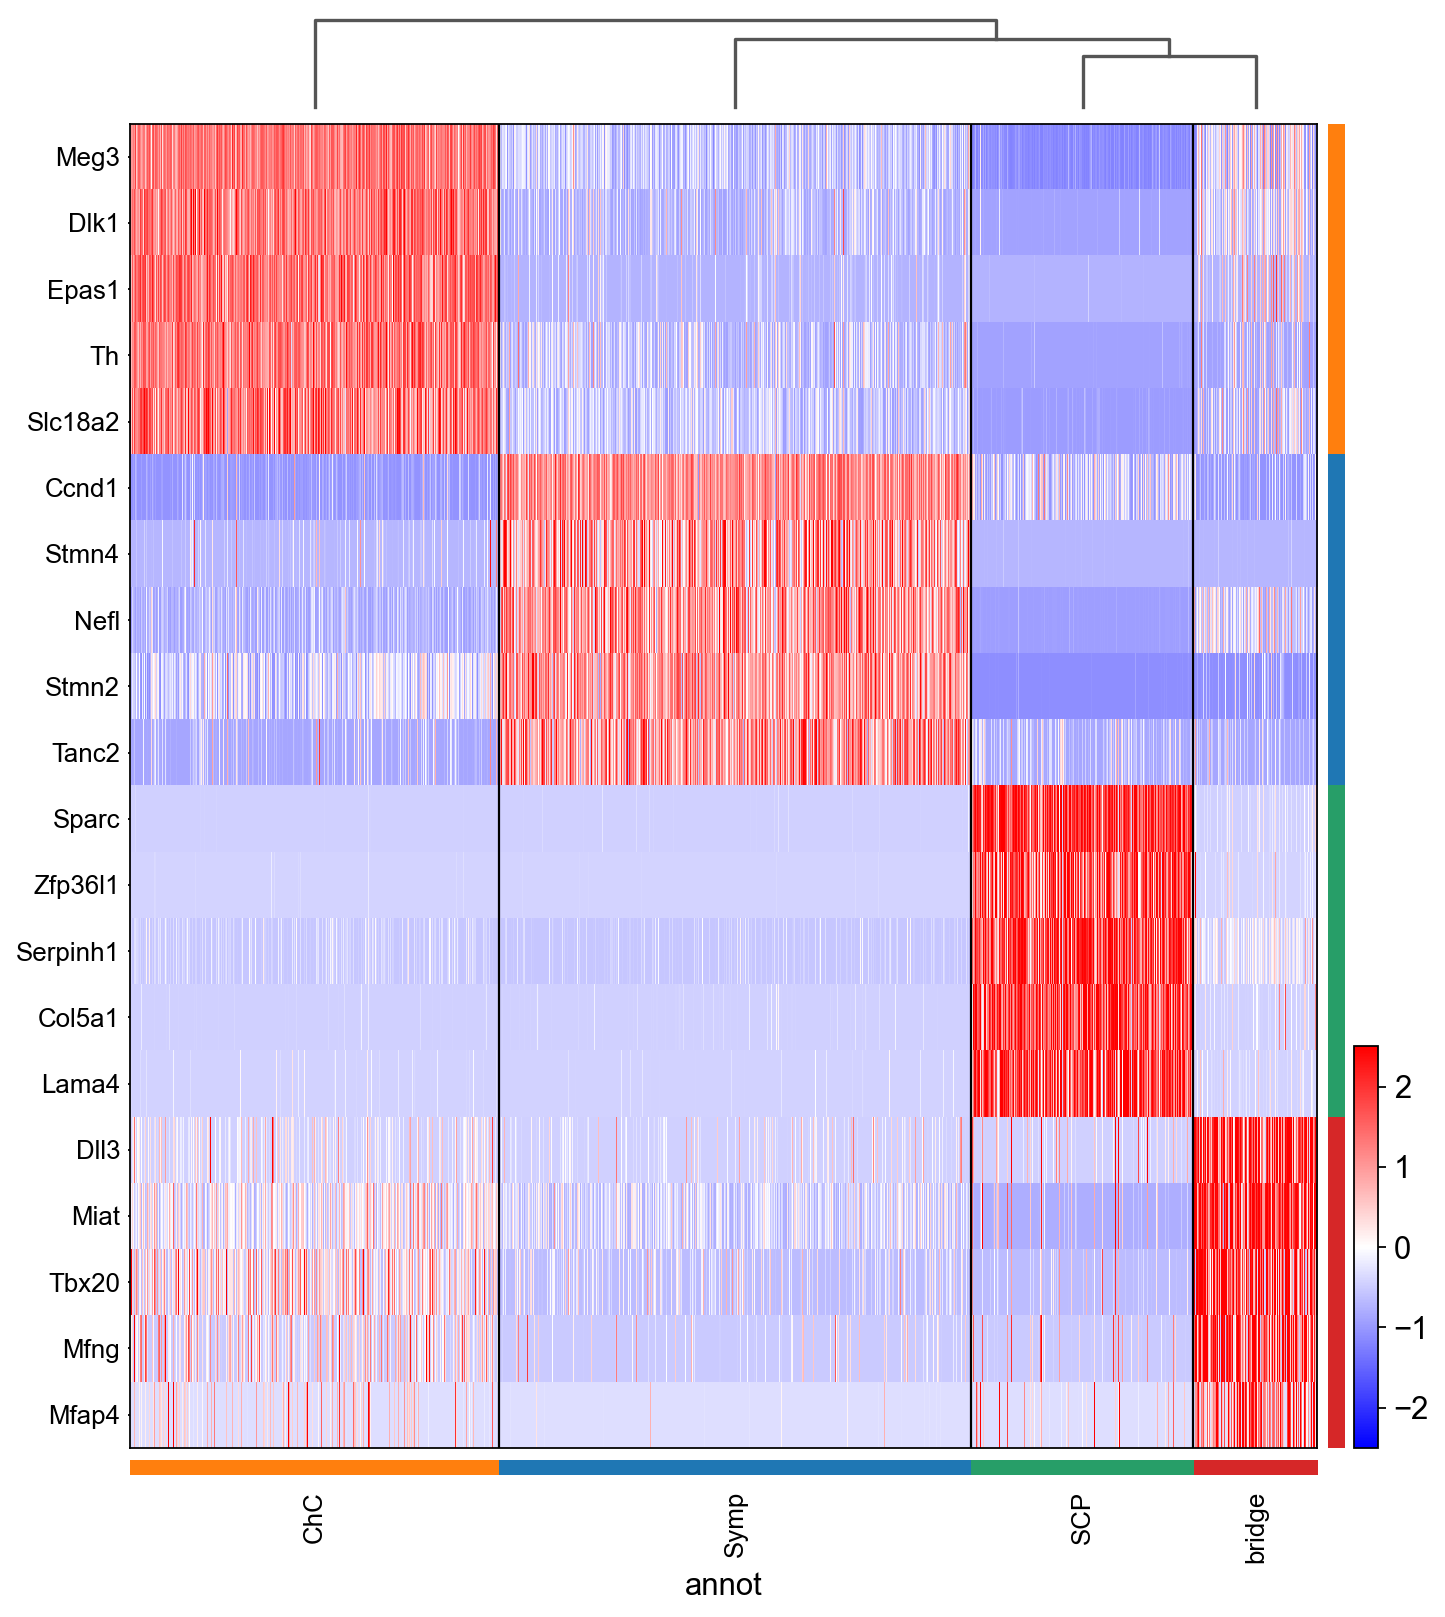

In [4]:
sc.set_figure_params()
sc.pl.rank_genes_groups_heatmap(adata,layer="scaled",figsize=(10,12),min_logfoldchange=2.5,show_gene_labels=True,
                                n_genes=5,vmin=-2.5,vmax=2.5,cmap="bwr",swap_axes=True)

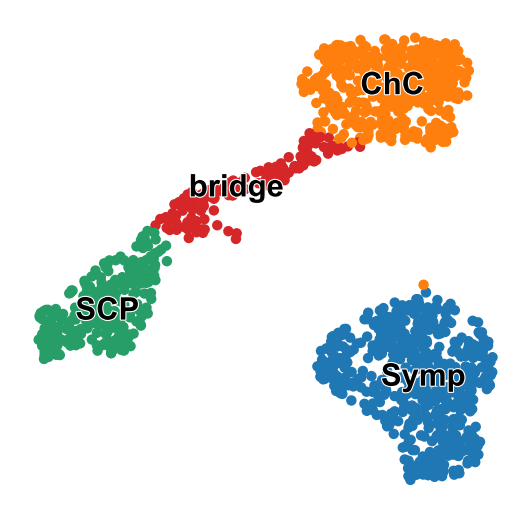

In [5]:
sc.set_figure_params(dpi_save=600)
sc.pl.umap(adata,color="annot",legend_loc="on data",legend_fontoutline=True,frameon=False,title="",save="overview.svg")

In [6]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_ERCC,pct_counts_ERCC,leiden,sample,location,treatment,doublets,S_score,G2M_score,phase,clusters_gradients,annot
SS2_20_127:A23,6134,354792.0,319.0,0.089912,2,SS2_20_127,ZO,PBS (control),False,-0.048997,-0.045123,G1,S_score,SCP
SS2_20_127:A15,6675,348847.0,378.0,0.108357,0,SS2_20_127,ZO,PBS (control),False,0.203153,0.159357,S,S_score,Symp
SS2_20_127:A17,6521,310282.0,154.0,0.049632,2,SS2_20_127,ZO,PBS (control),False,-0.065877,-0.043079,G1,S_score,SCP
SS2_20_127:A11,6081,347087.0,244.0,0.070299,0,SS2_20_127,ZO,PBS (control),False,0.159444,0.147946,S,S_score,Symp
SS2_20_127:A7,7686,363525.0,118.0,0.032460,0,SS2_20_127,ZO,PBS (control),False,-0.001360,0.314065,G2M,G2M_score,Symp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS2_20_125:P19,6123,243784.0,137.0,0.056197,0,SS2_20_125,Ad,PBS (control),False,-0.070263,-0.039275,G1,S_score,Symp
SS2_20_125:P15,6750,267760.0,231.0,0.086271,2,SS2_20_125,Ad,PBS (control),False,-0.017362,0.309727,G2M,G2M_score,SCP
SS2_20_125:P21,6313,113698.0,55.0,0.048374,0,SS2_20_125,Ad,PBS (control),False,0.153904,0.173254,G2M,G2M_score,Symp
SS2_20_125:P22,6448,226871.0,90.0,0.039670,0,SS2_20_125,Ad,PBS (control),False,0.222065,0.167781,S,S_score,Symp


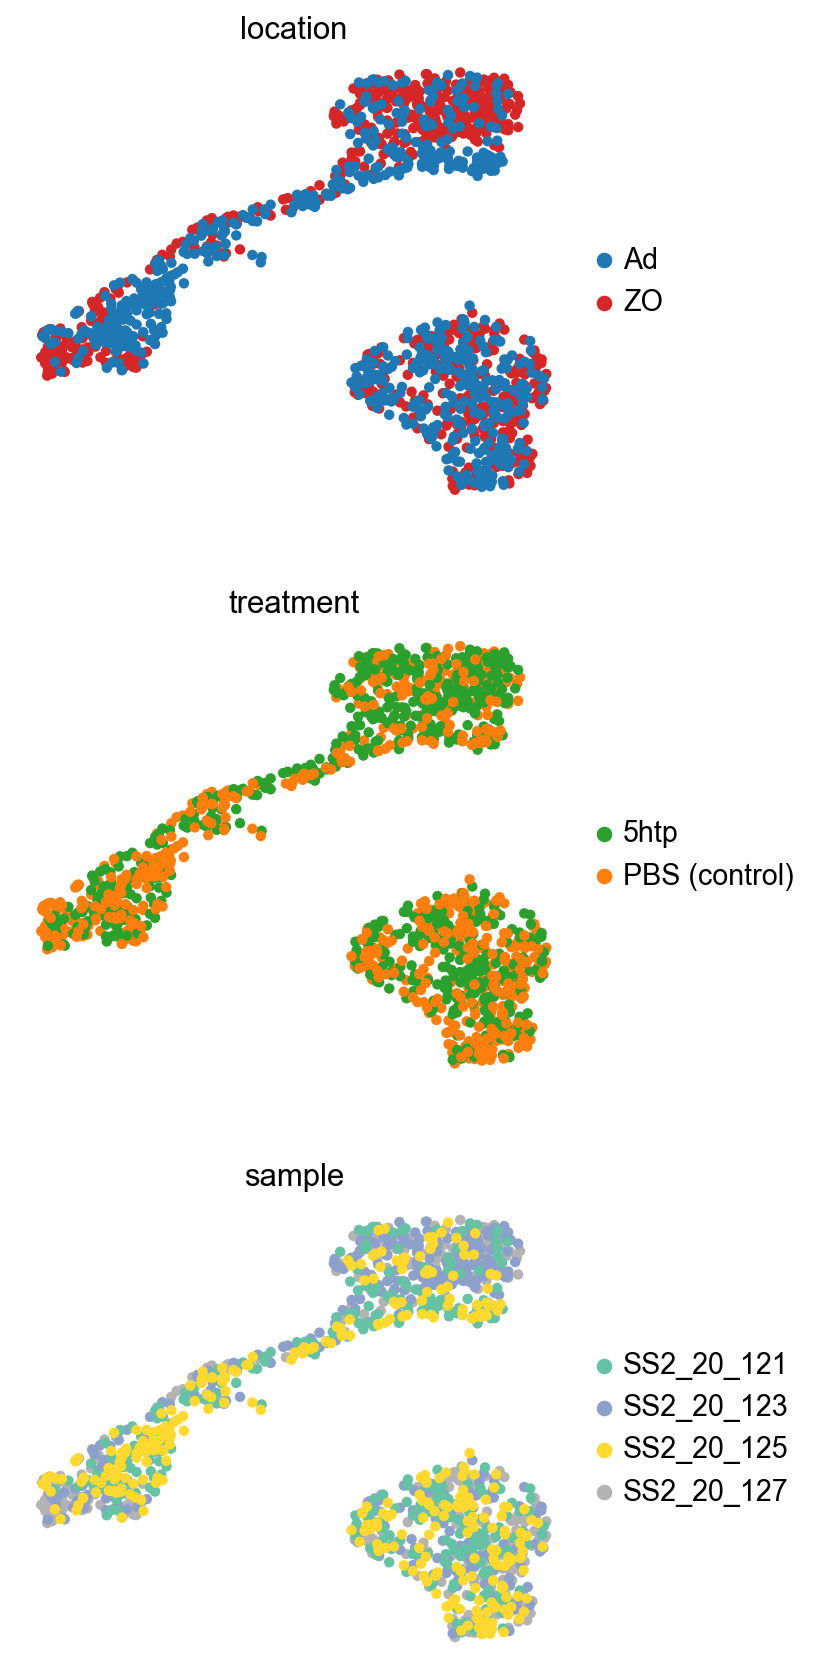

In [7]:
sc.pl.umap(adata,color=["location","treatment","sample"],frameon=False,save="additional_info.svg",ncols=1)

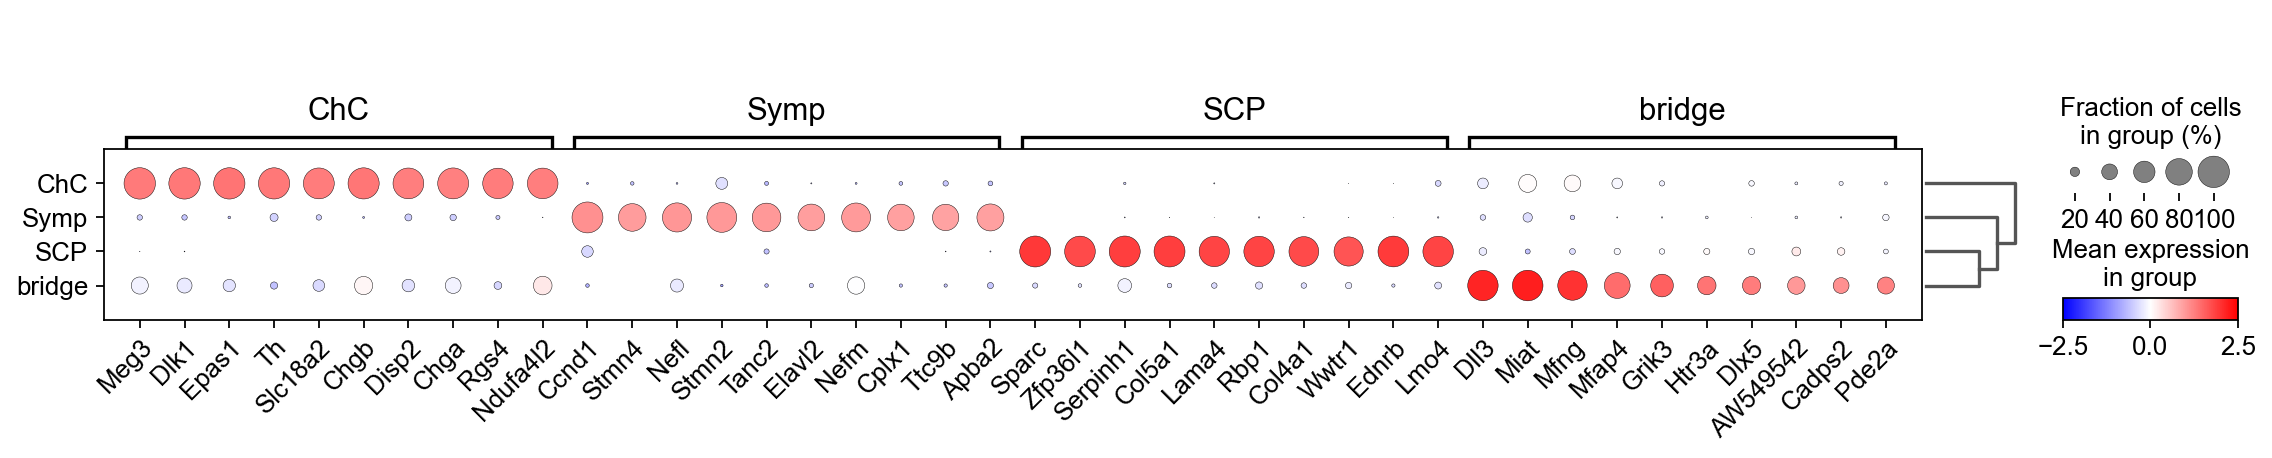

In [8]:
ax=sc.pl.rank_genes_groups_dotplot(adata,layer="scaled",n_genes=10,min_logfoldchange=3,vmin=-2.5,vmax=2.5,cmap="bwr",show=False,var_group_rotation=0)
plt.setp(ax['mainplot_ax'].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor");
plt.savefig("figures/dotplot.svg",bbox_inches='tight')

In [10]:
def volcano(df, x="logfold2change", y="padj", index=0, score_red=0.01, 
            n_anno=None, anno_id='index', log_y=True, adjust=True,ax=None):
    """Volcano plot for p values and weights
    """
    xval = df.logfoldchanges
    yval = df.pvals_adj
    
    if log_y:
        idx = yval < score_red
        n_anno = np.sum(idx) if n_anno is None else n_anno
        idx_anno = np.argsort(yval)[:n_anno]
        y_label = "-log10(%s)" %(y)
        
        yval = -np.log10(yval)
    else:
        idx = yval > score_red
        n_anno = np.sum(idx) if n_anno is None else n_anno
        idx_anno = np.argsort(yval)[-n_anno:]
        y_label = str(y)
    
    if ax is None:
        fig,ax = plt.subplots()
    
    ax.scatter(xval[~idx], yval[~idx], color="gray",rasterized=True)
    ax.scatter(xval[idx], yval[idx], color="firebrick",rasterized=True)
    
    lable = df.index
    
    texts = []
    for i in idx_anno:
        _label = lable[i]
        _xx = xval[i]
        _yy = yval[i]
        texts.append(ax.text(_xx, _yy, _label, size=8))
    
    if adjust and n_anno > 0:
        from adjustText import adjust_text
        adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
    
    ax.set_xlabel(x)
    ax.set_ylabel(y_label)

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


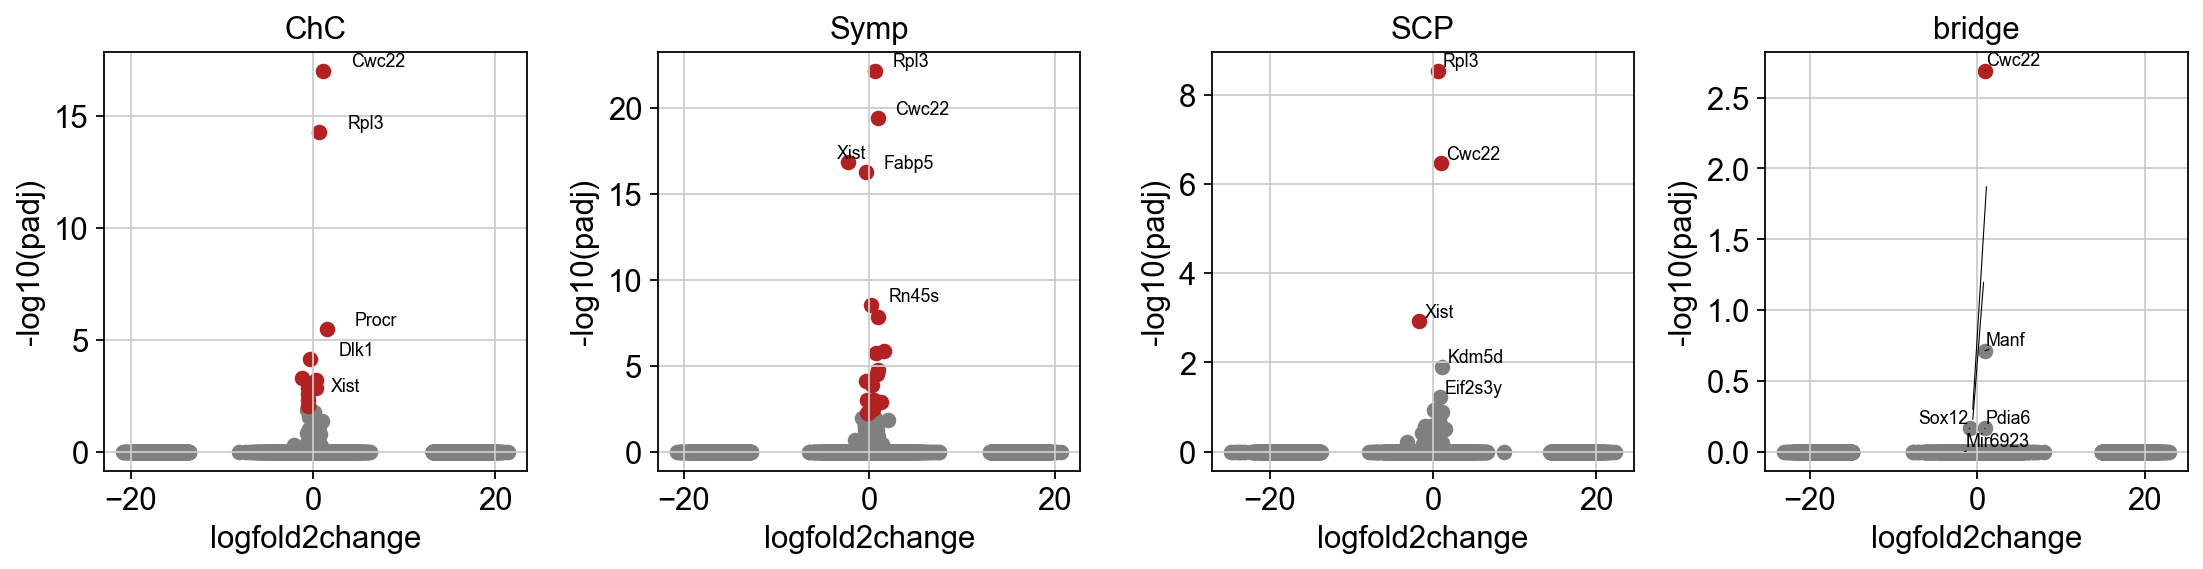

In [14]:
import numpy as np
fig, axs = plt.subplots(1,4,figsize=(14,3.8))

i=0
for an in ["ChC","Symp","SCP","bridge"]:
    adata_c=adata[adata.obs.annot==an]
    sc.tl.rank_genes_groups(adata_c,groupby="treatment",method="wilcoxon")
    df=sc.get.rank_genes_groups_df(adata_c,'5htp')
    df.set_index("names",inplace=True)
    volcano(df,ax=axs[i],n_anno=5)
    axs[i].set_title(an)
    i=i+1
plt.tight_layout()
plt.savefig("figures/volca.svg")    

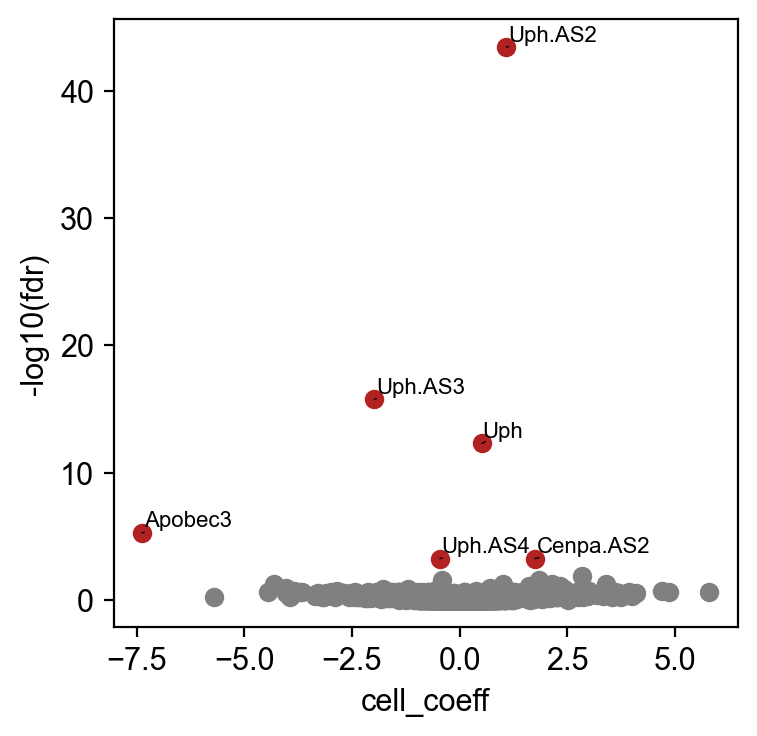

In [23]:
import brie
adata=sc.read("../BRIE2/strict_filt/brie_quant_cell.h5ad")

adata.var["add"]=["."+n.split(".")[1] if len(n.split("."))>1 else "" for n in adata.var_names]
adata.var_names=adata.var.GeneName.astype(str)+adata.var["add"]
fig = plt.figure(figsize=(4, 4))
brie.pl.volcano(adata, y='fdr', n_anno=6, adjust=True,score_red=0.01)
plt.savefig("figures/brie_volc.svg")

In [24]:
adata_gene=sc.read("adata_cc.h5ad")

In [26]:
adata_gene.uns["treatment_colors"]

array(['#2ca02c', '#ff7f0e'], dtype=object)

In [27]:
adata.obs["treatment"]=adata_gene.obs.treatment
adata.uns["treatment_colors"]=adata_gene.uns["treatment_colors"]

In [30]:
adata.uns["treatment_colors"]

array(['#2ca02c', '#ff7f0e'], dtype=object)

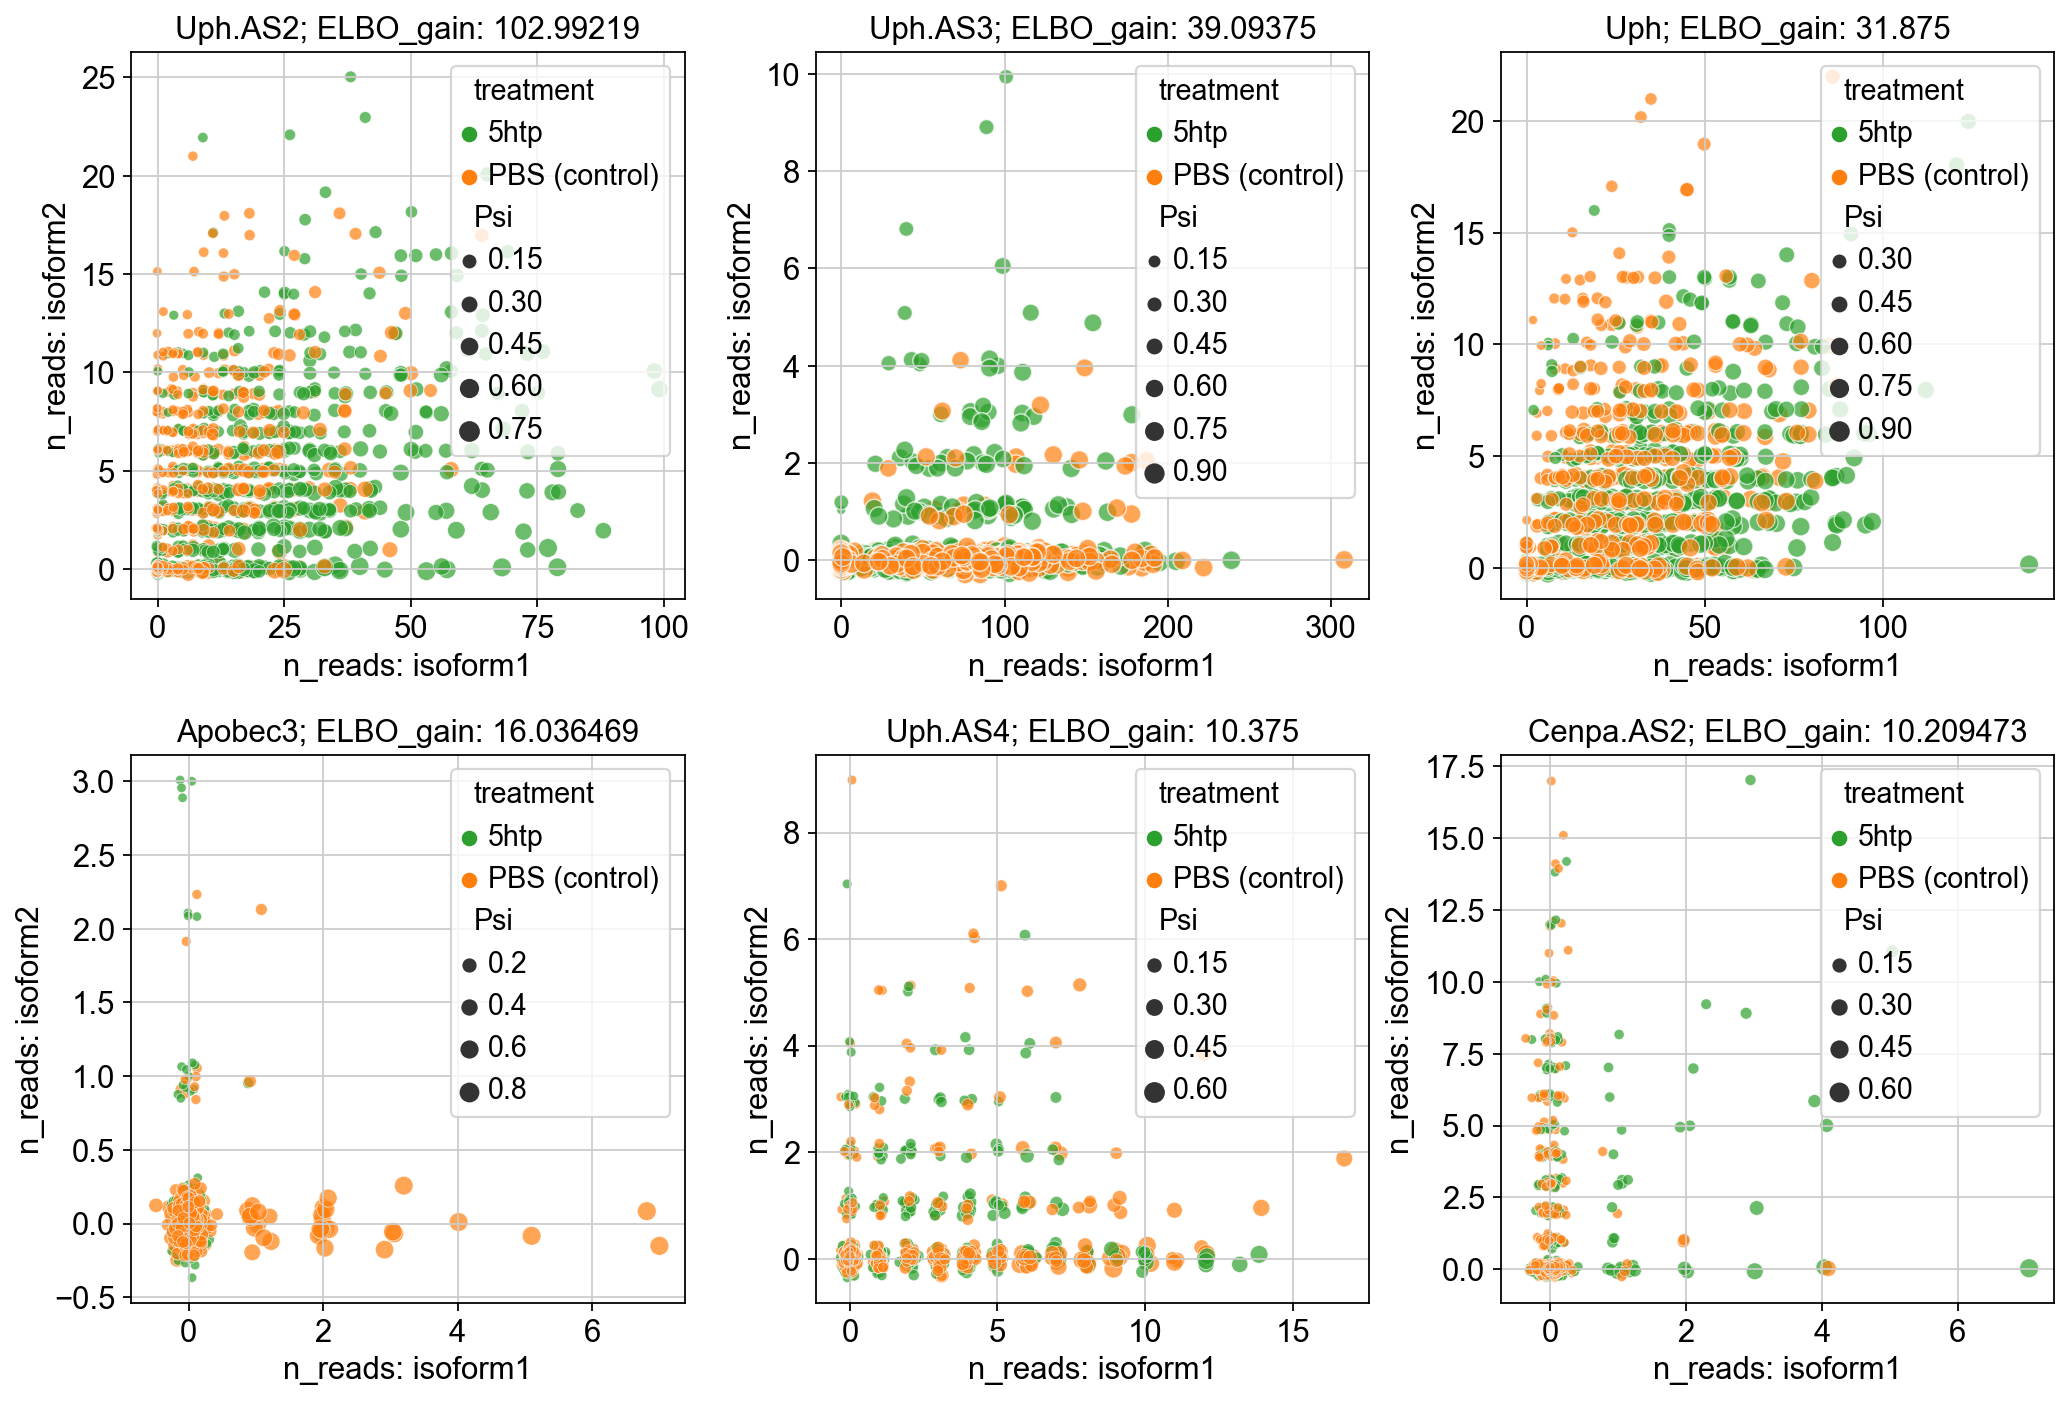

In [32]:
import pandas as pd
cell_info=pd.read_table("../BRIE2/cell_info.tsv",index_col=0)
#adata.obs["treatment"]=cell_info.loc[adata.obs_names,"isTreated"].values
#adata.obs["treatment"] = ['Treated' if x==1 else 'Ctrl' for x in adata.obs["treatment"]]
rank_idx = np.argsort(adata.varm['ELBO_gain'][:, 0])[::-1]
sc.set_figure_params(dpi_save=600)
fig = plt.figure(figsize=(13, 9))
brie.pl.counts(adata, genes=list(adata.var.index[rank_idx[:6]]),
               color='treatment', add_val='ELBO_gain', nrow=2,ncol=3, alpha=0.7,rasterized=True,palette=adata.uns["treatment_colors"].tolist())
# fig.savefig(dat_dir + '../../figures/fig_s8_counts.png', dpi=300, bbox_inches='tight')
plt.savefig("figures/brie_top.svg")

saving figure to file ./figures/scvelo_Apobec3.svg


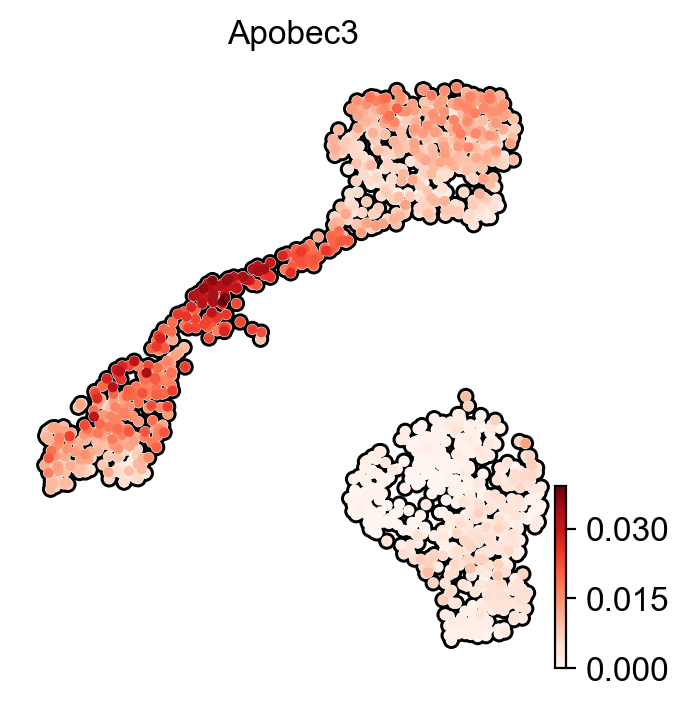

In [22]:
import scvelo as scv
adata=sc.read("adata_cc.h5ad")
scv.set_figure_params(figsize=(3.5,4))
scv.pl.umap(adata,color=["Apobec3"],add_outline=True,cmap="Reds",smooth=True,save="Apobec3.svg")